In [2]:
!mamba install osmnx
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, osmnx
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 2.567300000011921 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ __unix                        1.0.0                         hc286ada_0                    emscripten-forge              
+ affine                        2.4.0                         pyhd8ed1ab_1                  conda-forge                   
+ attrs                         25.4.0                        pyhcf101f3_1                  conda-forge                   
+ brotli-python                 1.2.0                         py313h33caa6c_0               emscripten-forge              
+ certifi                       2026.1.4             

In [10]:
# 1. СОЗДАНИЕ СИНТЕТИЧЕСКОГО ГРАФА ДОРОГ
print("="*80)
print("ЗАДАНИЕ 10: ГРАФ ДОРОГ И ЦЕНТРАЛЬНОСТИ")
print("="*80)

np.random.seed(42)

# Создаём сетку дорог (grid graph) с добавлением случайных связей
def create_road_graph(n_rows=8, n_cols=8, add_random_edges=10):
    """
    Создаёт синтетический граф дорог на основе сетки
    
    Параметры:
    - n_rows, n_cols: размеры сетки
    - add_random_edges: количество случайных дополнительных рёбер (для создания более реалистичной сети)
    """
    # Создаём базовую сетку
    G = nx.grid_2d_graph(n_rows, n_cols)
    
    # Переименовываем узлы для удобства
    mapping = {node: i for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)
    
    # Добавляем координаты узлам (для визуализации)
    pos = {}
    for i in range(n_rows):
        for j in range(n_cols):
            node_id = i * n_cols + j
            pos[node_id] = (j * 10, i * 10)  # координаты в метрах *10
    
    nx.set_node_attributes(G, pos, 'pos')
    
    # Добавляем случайные рёбра (для создания более реалистичной сети)
    n_nodes = len(G.nodes())
    added = 0
    while added < add_random_edges:
        u = np.random.randint(0, n_nodes)
        v = np.random.randint(0, n_nodes)
        if u != v and not G.has_edge(u, v):
            # Проверяем, что ребро не слишком длинное
            dist = np.sqrt((pos[u][0] - pos[v][0])**2 + (pos[u][1] - pos[v][1])**2)
            if dist < 30:  # не длиннее 30 метров
                G.add_edge(u, v)
                added += 1
    
    # Добавляем атрибуты рёбрам (длина)
    for u, v in G.edges():
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        length = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        G[u][v]['length'] = length
        G[u][v]['weight'] = length  # для кратчайших путей
    
    return G, pos

# Создаём граф
G, pos = create_road_graph(n_rows=8, n_cols=8, add_random_edges=15)

print(f"\n ХАРАКТЕРИСТИКИ ГРАФА:")
print(f"   Количество узлов (перекрёстков): {G.number_of_nodes()}")
print(f"   Количество рёбер (улиц): {G.number_of_edges()}")
print(f"   Средняя степень узла: {2 * G.number_of_edges() / G.number_of_nodes():.2f}")

ЗАДАНИЕ 10: ГРАФ ДОРОГ И ЦЕНТРАЛЬНОСТИ

 ХАРАКТЕРИСТИКИ ГРАФА:
   Количество узлов (перекрёстков): 64
   Количество рёбер (улиц): 127
   Средняя степень узла: 3.97


In [11]:
# 2. РАСЧЁТ ЦЕНТРАЛЬНОСТЕЙ

print("\n" + "="*80)
print("РАСЧЁТ ЦЕНТРАЛЬНОСТЕЙ")
print("="*80)

# 2.1 Degree Centrality (степень центральности)
# Количество связей узла
degree_cent = nx.degree_centrality(G)
degree_values = np.array(list(degree_cent.values()))

print("\n DEGREE CENTRALITY:")
print(f"   Минимальная: {degree_values.min():.4f}")
print(f"   Максимальная: {degree_values.max():.4f}")
print(f"   Средняя: {degree_values.mean():.4f}")
print(f"   Медианная: {np.median(degree_values):.4f}")

# 2.2 Closeness Centrality (близость к другим узлам)
# Среднее расстояние до всех других узлов
closeness_cent = nx.closeness_centrality(G, distance='length')
closeness_values = np.array(list(closeness_cent.values()))

print("\n CLOSENESS CENTRALITY:")
print(f"   Минимальная: {closeness_values.min():.4f}")
print(f"   Максимальная: {closeness_values.max():.4f}")
print(f"   Средняя: {closeness_values.mean():.4f}")

# 2.3 Betweenness Centrality (транзитная центральность)
# Как часто узел встречается на кратчайших путях между другими узлами
print("\n   Расчёт Betweenness Centrality (может занять несколько секунд)...")
betweenness_cent = nx.betweenness_centrality(G, weight='length')
betweenness_values = np.array(list(betweenness_cent.values()))

print("\n BETWEENNESS CENTRALITY:")
print(f"   Минимальная: {betweenness_values.min():.4f}")
print(f"   Максимальная: {betweenness_values.max():.4f}")
print(f"   Средняя: {betweenness_values.mean():.4f}")

# 2.4 Eigenvector Centrality (собственный вектор центральности)
# Важность узла определяется важностью его соседей
try:
    eigenvector_cent = nx.eigenvector_centrality(G, weight='length', max_iter=1000)
    eigenvector_values = np.array(list(eigenvector_cent.values()))
    
    print("\n EIGENVECTOR CENTRALITY:")
    print(f"   Минимальная: {eigenvector_values.min():.4f}")
    print(f"   Максимальная: {eigenvector_values.max():.4f}")
    print(f"   Средняя: {eigenvector_values.mean():.4f}")
except:
    print("\n Не удалось рассчитать Eigenvector Centrality")
    eigenvector_cent = {node: 0 for node in G.nodes()}



РАСЧЁТ ЦЕНТРАЛЬНОСТЕЙ

 DEGREE CENTRALITY:
   Минимальная: 0.0317
   Максимальная: 0.1270
   Средняя: 0.0630
   Медианная: 0.0635

 CLOSENESS CENTRALITY:
   Минимальная: 0.0152
   Максимальная: 0.0264
   Средняя: 0.0208

   Расчёт Betweenness Centrality (может занять несколько секунд)...

 BETWEENNESS CENTRALITY:
   Минимальная: 0.0009
   Максимальная: 0.1775
   Средняя: 0.0534

 EIGENVECTOR CENTRALITY:
   Минимальная: 0.0038
   Максимальная: 0.5057
   Средняя: 0.0865


In [12]:
# 3. ТОП УЗЛОВ ПО ЦЕНТРАЛЬНОСТЯМ

print("\n" + "="*80)
print("ТОП-5 УЗЛОВ ПО КАЖДОЙ ЦЕНТРАЛЬНОСТИ")
print("="*80)

# Функция для вывода топ узлов
def print_top_nodes(cent_dict, cent_name, n=5):
    sorted_nodes = sorted(cent_dict.items(), key=lambda x: x[1], reverse=True)[:n]
    print(f"\n{cent_name}:")
    for i, (node, value) in enumerate(sorted_nodes, 1):
        x, y = pos[node]
        print(f"   {i}. Узел {node} (коорд. ({x:.0f}, {y:.0f})): {value:.4f}")

print_top_nodes(degree_cent, "Топ по Degree Centrality")
print_top_nodes(closeness_cent, "Топ по Closeness Centrality")
print_top_nodes(betweenness_cent, "Топ по Betweenness Centrality")


ТОП-5 УЗЛОВ ПО КАЖДОЙ ЦЕНТРАЛЬНОСТИ

Топ по Degree Centrality:
   1. Узел 43 (коорд. (30, 50)): 0.1270
   2. Узел 13 (коорд. (50, 10)): 0.0952
   3. Узел 25 (коорд. (10, 30)): 0.0952
   4. Узел 46 (коорд. (60, 50)): 0.0952
   5. Узел 14 (коорд. (60, 10)): 0.0794

Топ по Closeness Centrality:
   1. Узел 28 (коорд. (40, 30)): 0.0264
   2. Узел 36 (коорд. (40, 40)): 0.0264
   3. Узел 43 (коорд. (30, 50)): 0.0264
   4. Узел 27 (коорд. (30, 30)): 0.0263
   5. Узел 35 (коорд. (30, 40)): 0.0263

Топ по Betweenness Centrality:
   1. Узел 43 (коорд. (30, 50)): 0.1775
   2. Узел 28 (коорд. (40, 30)): 0.1252
   3. Узел 25 (коорд. (10, 30)): 0.1222
   4. Узел 36 (коорд. (40, 40)): 0.1197
   5. Узел 27 (коорд. (30, 30)): 0.1099


In [13]:
# 4. ПОИСК УЗКИХ МЕСТ СЕТИ

print("\n" + "="*80)
print("ПОИСК 'УЗКИХ МЕСТ' СЕТИ")
print("="*80)

# Узкие места: узлы с высокой betweenness, но низкой degree
# (критически важные соединения с малым числом альтернатив)
threshold_betweenness = np.percentile(betweenness_values, 75)  # верхние 25%
threshold_degree = np.percentile(degree_values, 25)  # нижние 25%

bottlenecks = []
for node in G.nodes():
    if betweenness_cent[node] > threshold_betweenness and degree_cent[node] < threshold_degree:
        bottlenecks.append(node)

print(f"\n КРИТЕРИИ ПОИСКА:")
print(f"   Betweenness > {threshold_betweenness:.4f} (верхние 25%)")
print(f"   Degree < {threshold_degree:.4f} (нижние 25%)")
print(f"\n   Найдено узких мест: {len(bottlenecks)}")

if bottlenecks:
    print("\n   Список узких мест:")
    for i, node in enumerate(bottlenecks[:10], 1):  # покажем первые 10
        x, y = pos[node]
        print(f"   {i}. Узел {node} (коорд. ({x:.0f}, {y:.0f})): "
              f"Betweenness={betweenness_cent[node]:.4f}, Degree={degree_cent[node]:.4f}")



ПОИСК 'УЗКИХ МЕСТ' СЕТИ

 КРИТЕРИИ ПОИСКА:
   Betweenness > 0.0772 (верхние 25%)
   Degree < 0.0476 (нижние 25%)

   Найдено узких мест: 0


In [14]:
# 5. ПОСТРОЕНИЕ МАРШРУТА

print("\n" + "="*80)
print("ПОСТРОЕНИЕ МАРШРУТА МЕЖДУ ДВУМЯ ТОЧКАМИ")
print("="*80)

# Выбираем две случайные точки
nodes_list = list(G.nodes())
start_node = nodes_list[0]
end_node = nodes_list[-1]

print(f"\n МАРШРУТ:")
print(f"   Начальная точка: узел {start_node} (коорд. {pos[start_node]})")
print(f"   Конечная точка: узел {end_node} (коорд. {pos[end_node]})")

# Находим кратчайший путь по длине
try:
    shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='length')
    path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length')
    
    print(f"\n   Кратчайший путь: {' → '.join(map(str, shortest_path))}")
    print(f"   Длина пути: {path_length:.2f} метров")
    
    # Альтернативный маршрут (по количеству рёбер)
    shortest_path_edges = nx.shortest_path(G, source=start_node, target=end_node, weight=None)
    path_edges_length = sum(G[u][v]['length'] for u, v in zip(shortest_path_edges[:-1], shortest_path_edges[1:]))
    
    print(f"\n   Альтернативный путь (мин. число рёбер): {' → '.join(map(str, shortest_path_edges))}")
    print(f"   Длина альтернативного пути: {path_edges_length:.2f} метров")
    
except nx.NetworkXNoPath:
    print("   Нет пути между выбранными узлами!")



ПОСТРОЕНИЕ МАРШРУТА МЕЖДУ ДВУМЯ ТОЧКАМИ

 МАРШРУТ:
   Начальная точка: узел 0 (коорд. (0, 0))
   Конечная точка: узел 63 (коорд. (70, 70))

   Кратчайший путь: 0 → 8 → 25 → 33 → 41 → 59 → 60 → 61 → 62 → 63
   Длина пути: 120.64 метров

   Альтернативный путь (мин. число рёбер): 0 → 8 → 25 → 43 → 29 → 21 → 39 → 47 → 55 → 63
   Длина альтернативного пути: 157.21 метров



ВИЗУАЛИЗАЦИЯ ГРАФА И ЦЕНТРАЛЬНОСТЕЙ


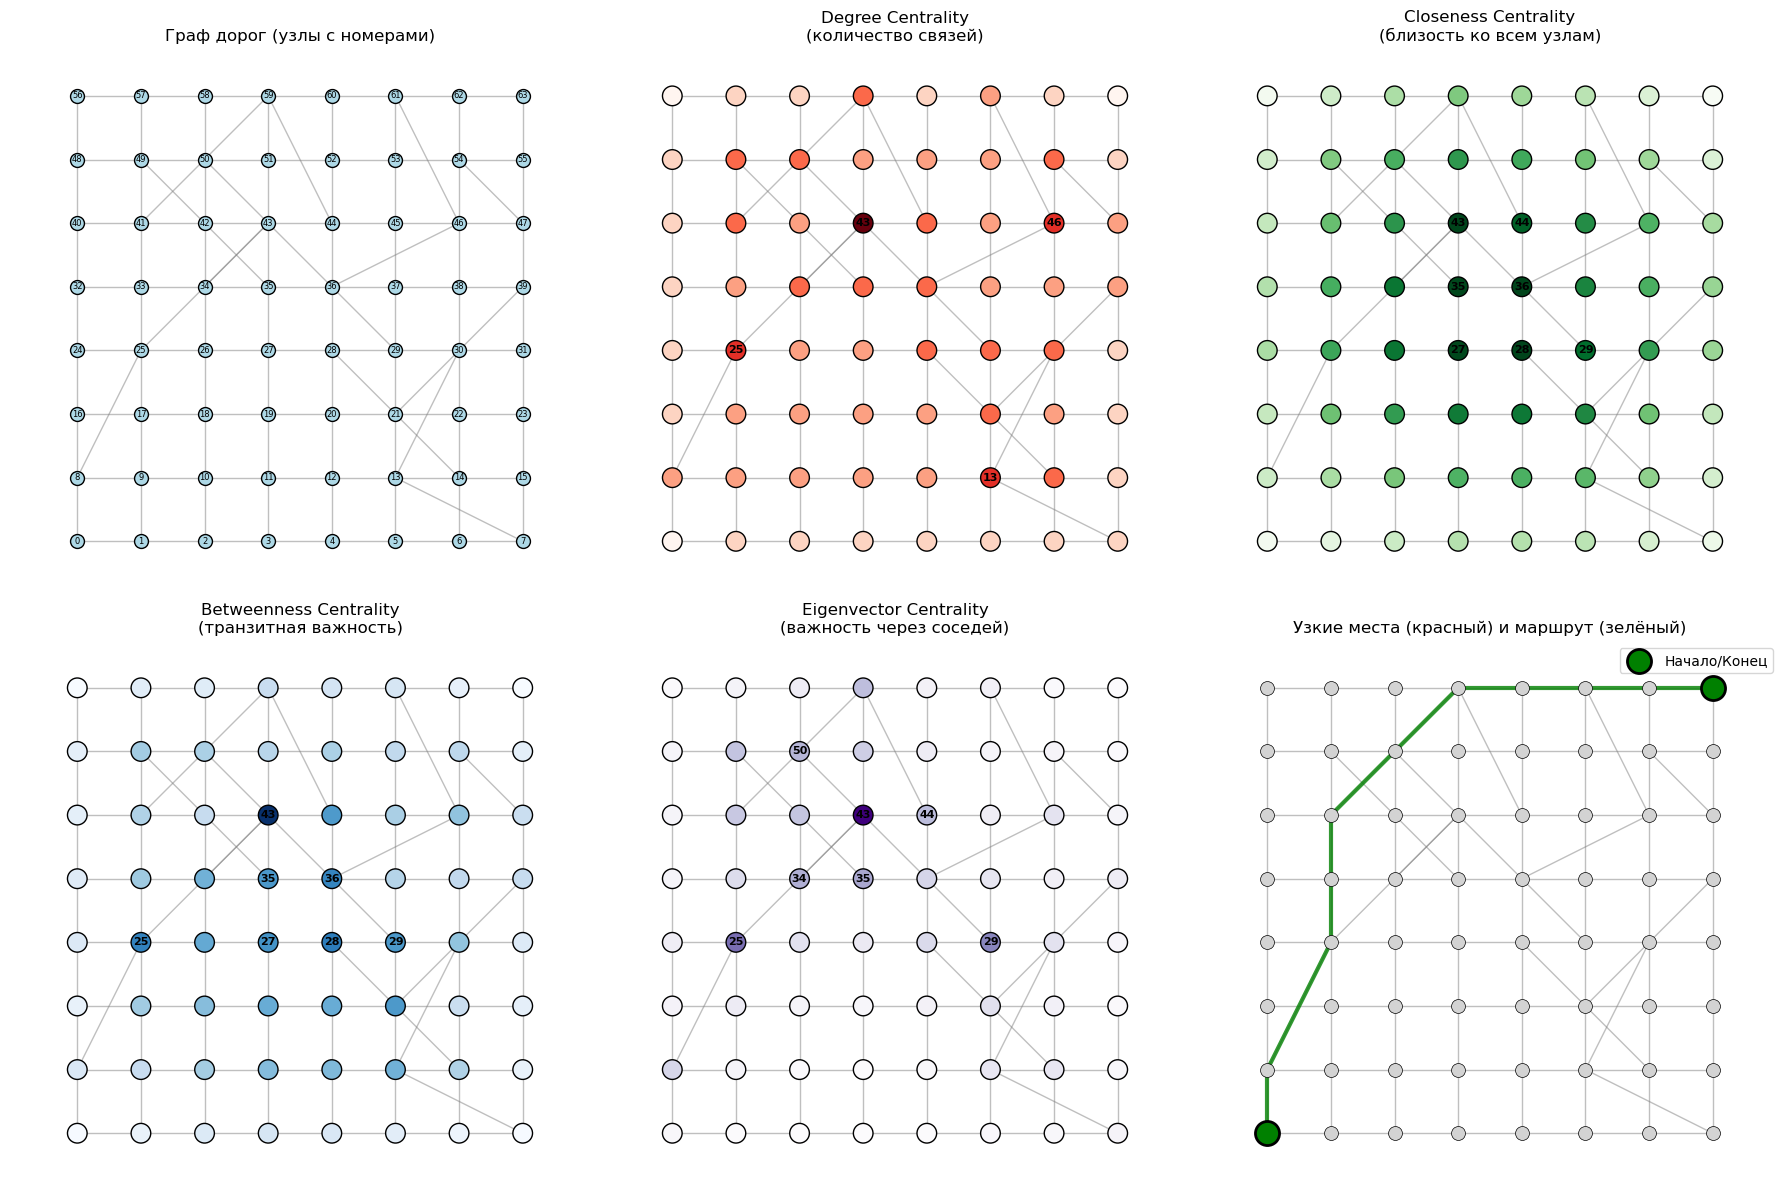

In [15]:
# 6. ВИЗУАЛИЗАЦИЯ

print("\n" + "="*80)
print("ВИЗУАЛИЗАЦИЯ ГРАФА И ЦЕНТРАЛЬНОСТЕЙ")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Функция для рисования графа с цветом узлов по центральности
def draw_graph_with_centrality(ax, G, pos, cent_dict, title, cmap='hot', node_size=200):
    # Нормализуем значения для цвета
    values = np.array([cent_dict[node] for node in G.nodes()])
    norm_values = (values - values.min()) / (values.max() - values.min() + 1e-10)
    
    # Рисуем рёбра
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', width=1, alpha=0.5)
    
    # Рисуем узлы с цветом
    nodes = nx.draw_networkx_nodes(G, pos, ax=ax, 
                                   node_color=norm_values,
                                   cmap=cmap,
                                   node_size=node_size,
                                   edgecolors='black',
                                   linewidths=1)
    
    # Добавляем подписи для важных узлов
    labels = {}
    threshold = np.percentile(values, 90)
    for node in G.nodes():
        if cent_dict[node] > threshold:
            labels[node] = str(node)
    
    nx.draw_networkx_labels(G, pos, labels, ax=ax, font_size=8, font_weight='bold')
    
    ax.set_title(title)
    ax.axis('equal')
    ax.axis('off')
    
    return nodes

# 1. Граф (базовый)
ax = axes[0, 0]
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', width=1, alpha=0.5)
nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', 
                       node_size=100, edgecolors='black', linewidths=1)
nx.draw_networkx_labels(G, pos, {node: str(node) for node in G.nodes()}, 
                        ax=ax, font_size=6)
ax.set_title('Граф дорог (узлы с номерами)')
ax.axis('equal')
ax.axis('off')

# 2. Degree Centrality
draw_graph_with_centrality(axes[0, 1], G, pos, degree_cent, 
                          'Degree Centrality\n(количество связей)', 'Reds')

# 3. Closeness Centrality
draw_graph_with_centrality(axes[0, 2], G, pos, closeness_cent, 
                          'Closeness Centrality\n(близость ко всем узлам)', 'Greens')

# 4. Betweenness Centrality
draw_graph_with_centrality(axes[1, 0], G, pos, betweenness_cent, 
                          'Betweenness Centrality\n(транзитная важность)', 'Blues')

# 5. Eigenvector Centrality
draw_graph_with_centrality(axes[1, 1], G, pos, eigenvector_cent, 
                          'Eigenvector Centrality\n(важность через соседей)', 'Purples')

# 6. Узкие места и маршрут
ax = axes[1, 2]
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray', width=1, alpha=0.5)

# Обычные узлы
nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgray', 
                       node_size=100, edgecolors='black', linewidths=0.5)

# Узкие места
if bottlenecks:
    nx.draw_networkx_nodes(G, pos, nodelist=bottlenecks, ax=ax, 
                          node_color='red', node_size=200, 
                          edgecolors='black', linewidths=2, label='Узкие места')

# Маршрут
if 'shortest_path' in locals():
    path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, ax=ax,
                          edge_color='green', width=3, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=[start_node, end_node], ax=ax,
                          node_color='green', node_size=300,
                          edgecolors='black', linewidths=2, label='Начало/Конец')

ax.set_title('Узкие места (красный) и маршрут (зелёный)')
ax.axis('equal')
ax.axis('off')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


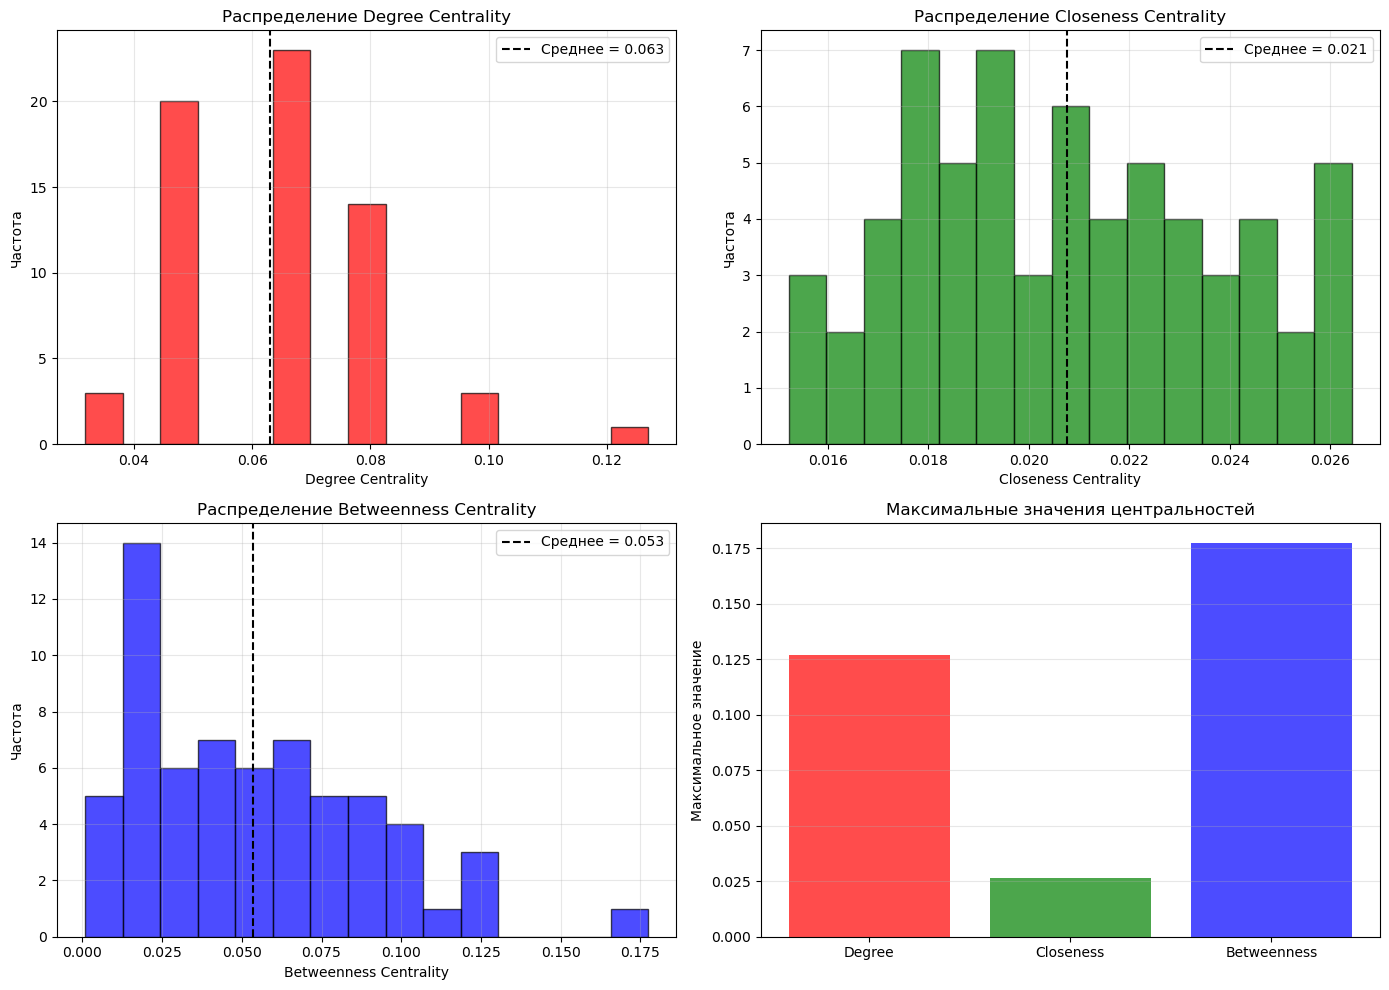

In [16]:
# 7. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ: РАСПРЕДЕЛЕНИЕ ЦЕНТРАЛЬНОСТЕЙ

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Degree
ax = axes[0, 0]
ax.hist(degree_values, bins=15, color='red', alpha=0.7, edgecolor='black')
ax.axvline(degree_values.mean(), color='black', linestyle='--', 
           label=f'Среднее = {degree_values.mean():.3f}')
ax.set_xlabel('Degree Centrality')
ax.set_ylabel('Частота')
ax.set_title('Распределение Degree Centrality')
ax.legend()
ax.grid(True, alpha=0.3)

# Closeness
ax = axes[0, 1]
ax.hist(closeness_values, bins=15, color='green', alpha=0.7, edgecolor='black')
ax.axvline(closeness_values.mean(), color='black', linestyle='--',
           label=f'Среднее = {closeness_values.mean():.3f}')
ax.set_xlabel('Closeness Centrality')
ax.set_ylabel('Частота')
ax.set_title('Распределение Closeness Centrality')
ax.legend()
ax.grid(True, alpha=0.3)

# Betweenness
ax = axes[1, 0]
ax.hist(betweenness_values, bins=15, color='blue', alpha=0.7, edgecolor='black')
ax.axvline(betweenness_values.mean(), color='black', linestyle='--',
           label=f'Среднее = {betweenness_values.mean():.3f}')
ax.set_xlabel('Betweenness Centrality')
ax.set_ylabel('Частота')
ax.set_title('Распределение Betweenness Centrality')
ax.legend()
ax.grid(True, alpha=0.3)

# Сравнение топ узлов
ax = axes[1, 1]
metrics = ['Degree', 'Closeness', 'Betweenness']
top_values = [
    np.max(degree_values),
    np.max(closeness_values),
    np.max(betweenness_values)
]
ax.bar(metrics, top_values, color=['red', 'green', 'blue'], alpha=0.7)
ax.set_ylabel('Максимальное значение')
ax.set_title('Максимальные значения центральностей')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
